In [75]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 22, 'legend.handlelength'  : 1.5
    , 'legend.markerscale': 2.})

## Physical space

In [76]:
N = 128 
x = np.linspace(0,20,N) 
y = np.linspace(-7.5,7.5,N)
X,Y = np.meshgrid(x,y)
dx = np.abs(x[1]-x[0])

## Spectral space

In [77]:
dk = 1./(N*dx)
k = np.arange(-N/2,N/2)*dk
dy = np.abs(y[2]-y[1])
dl = 1./(N*dy)
l = np.arange(-N/2,N/2)*dl

# The initial conditions: a guassian wave packet

In [176]:
k0,l0 = 2.,0.    # wavenumber
x0,y0 = 5.,0.    # initial position
a = 2.           # spatial decay scale
R = np.sqrt((X-x0)**2 + (Y-y0)**2)
ey = np.exp(-(y/a)**2)
v0  = np.exp( -(R/a)**2 )*np.cos(2*np.pi*(k0*X+l0*Y))
v0f = np.fft.fftshift(np.fft.fft2(v0))

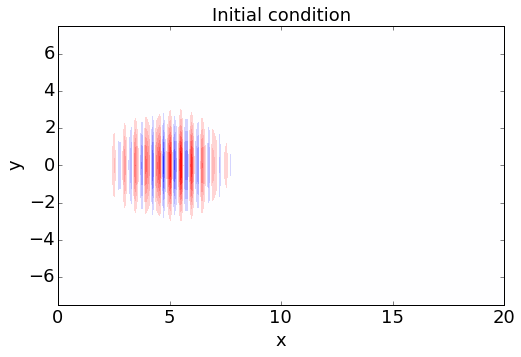

In [190]:
ctt = np.append(np.arange(-.9,0,.1),np.arange(.1,1.,.1))
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.contourf(x,y,v0,ctt,vmin=-.9,vmax=.9,cmap="bwr")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Initial condition")

# The dispersion relationship

We use the dispersion relationship for Rossby waves

\begin{equation}
\omega = \frac{-\beta\, k}{k^2 + l^2 + \kappa_d^2},
\end{equation}
to march forward.

In [180]:
K,L = np.meshgrid(k,l)
omega = -K/(K**2 + L**2 + 1.)  # short rossby waves

In [181]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation


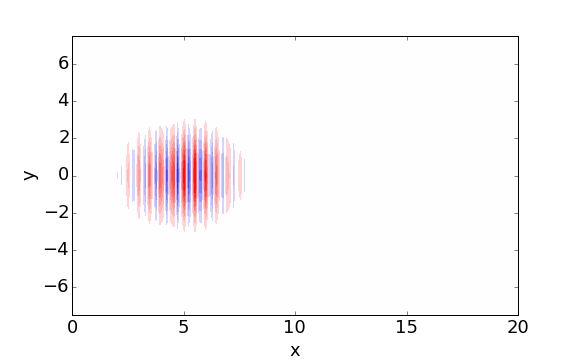
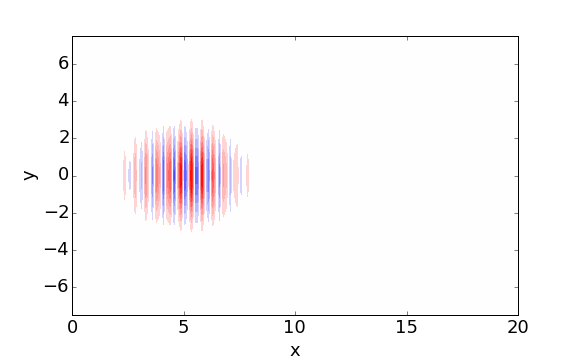
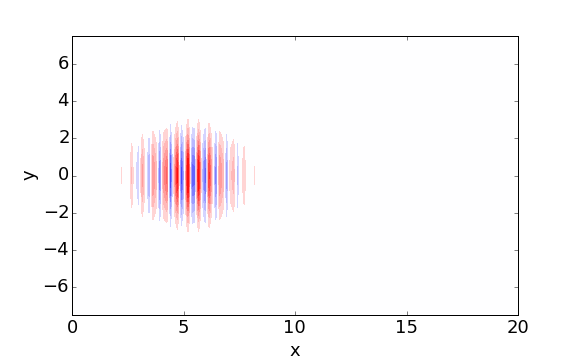
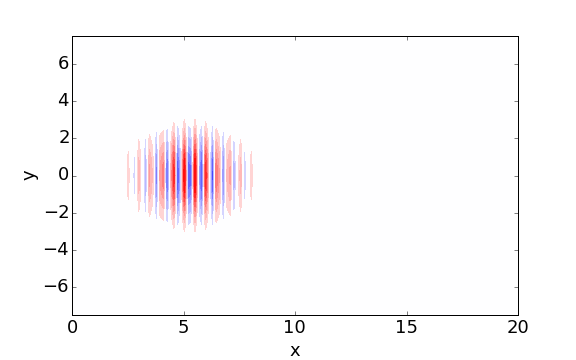
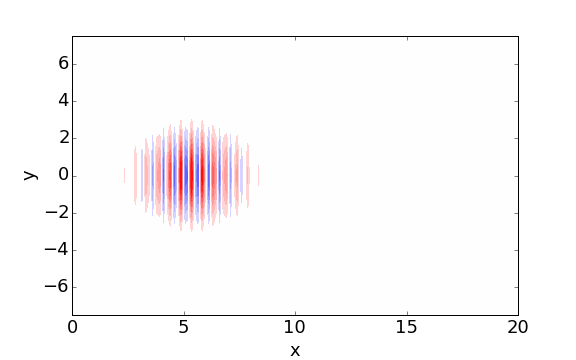
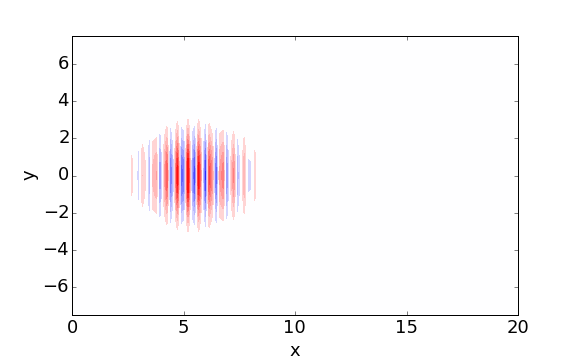
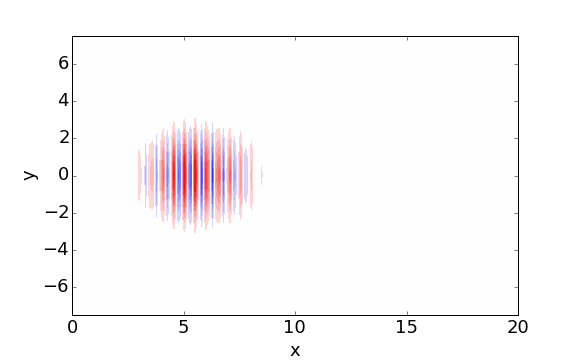
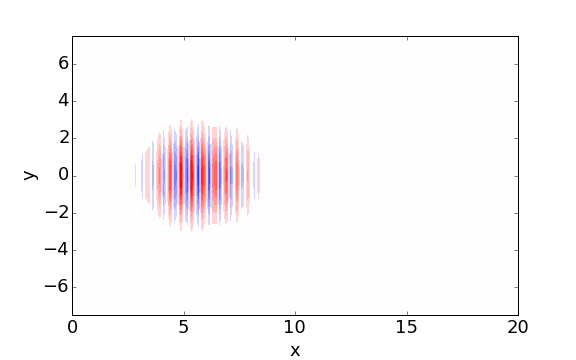
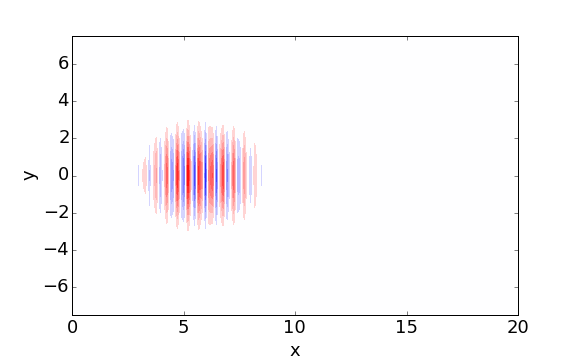
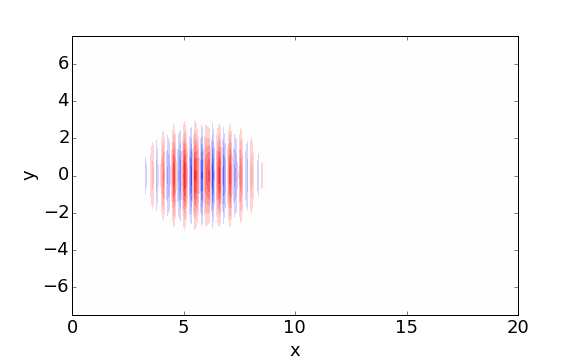
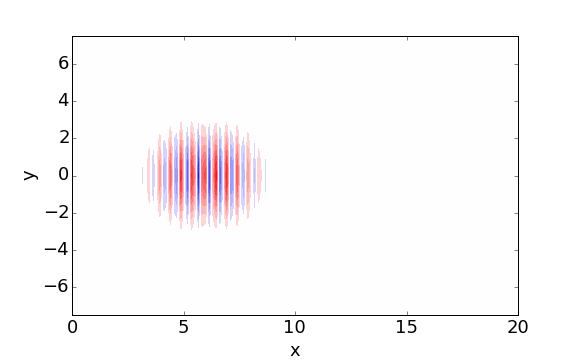
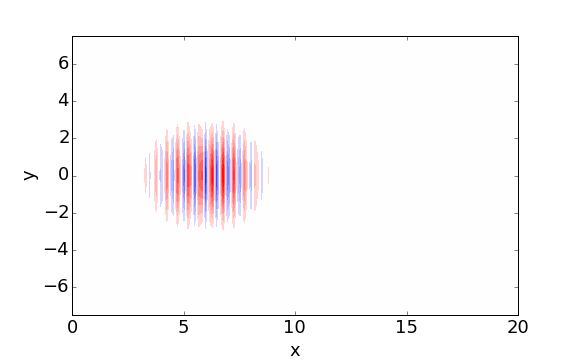
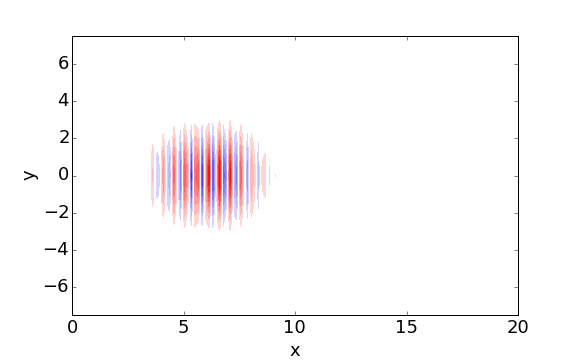
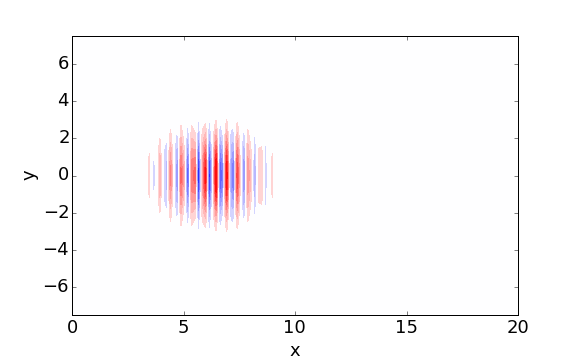
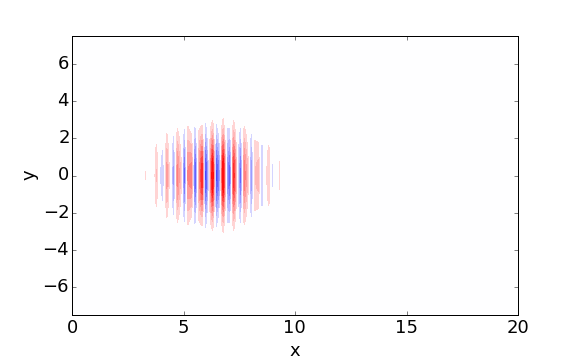
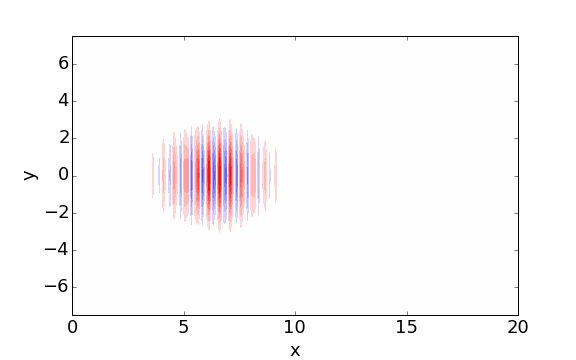
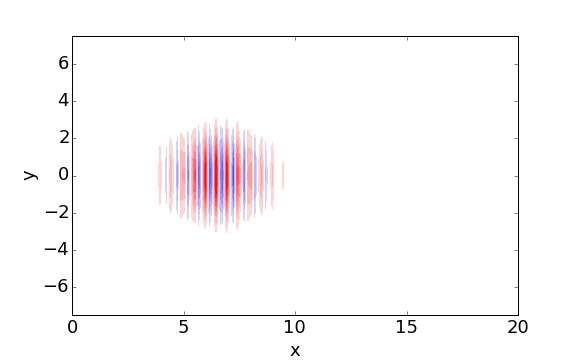
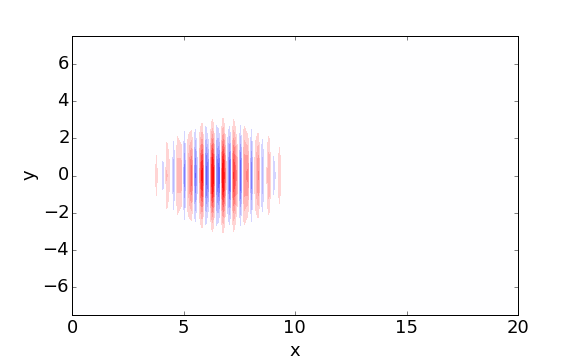
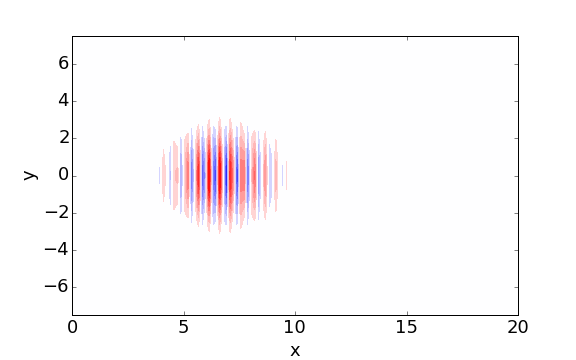
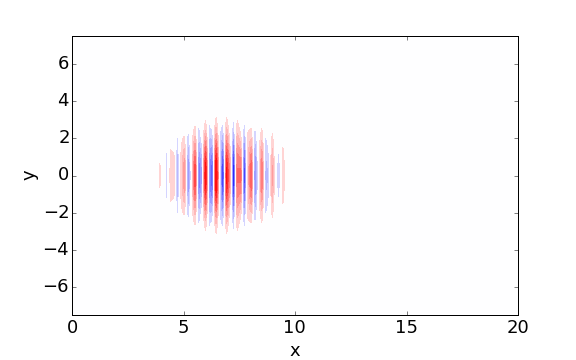
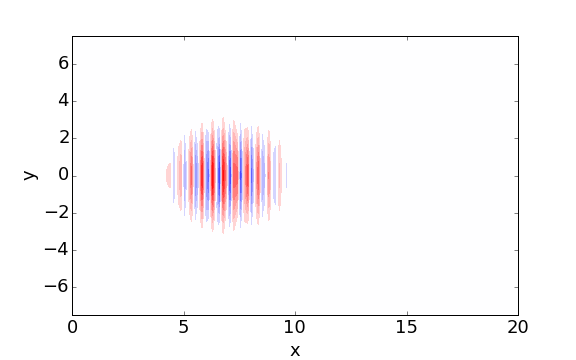
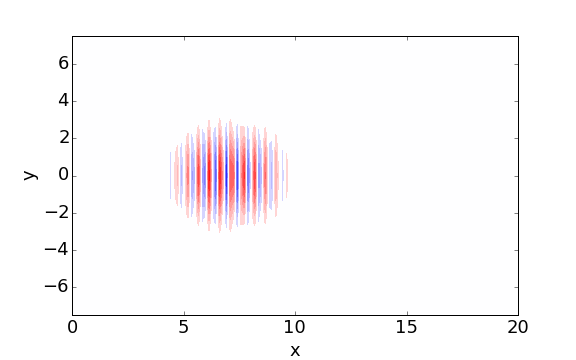
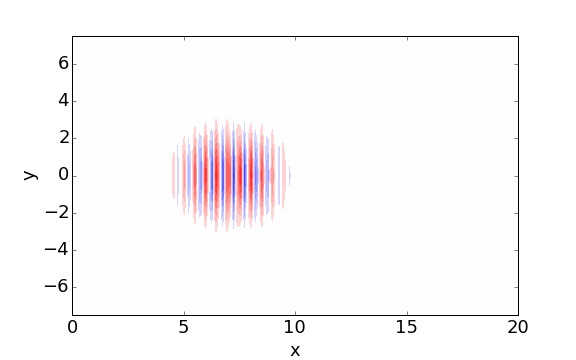
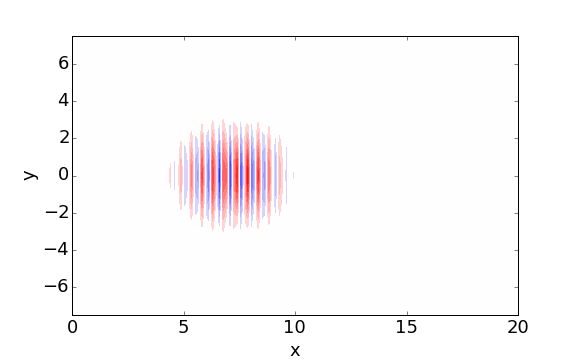
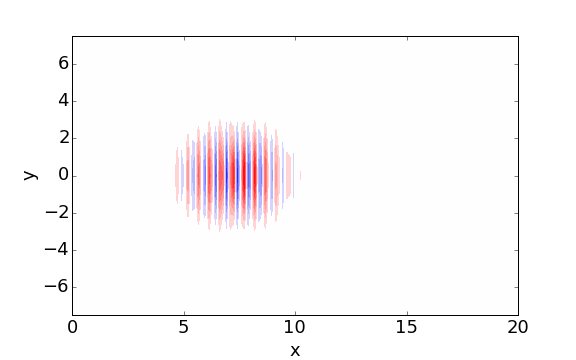
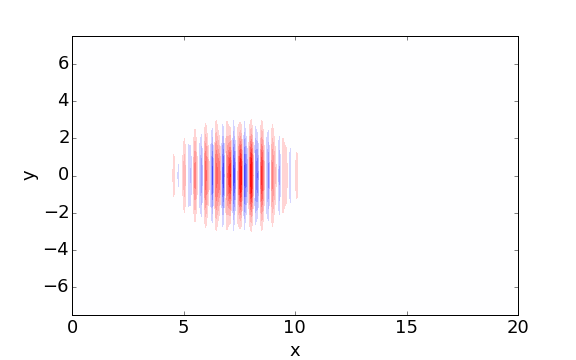
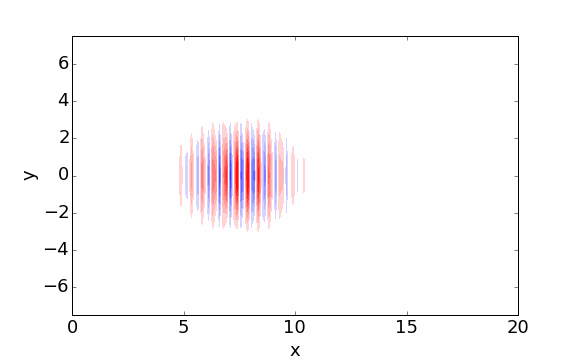
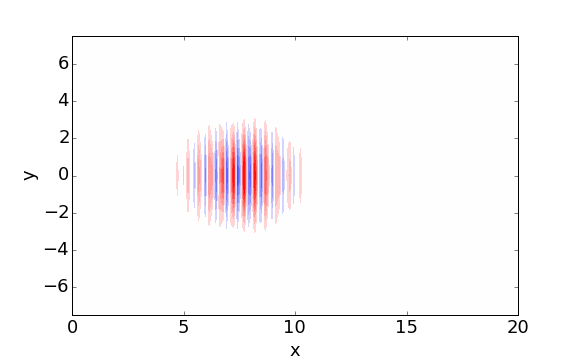
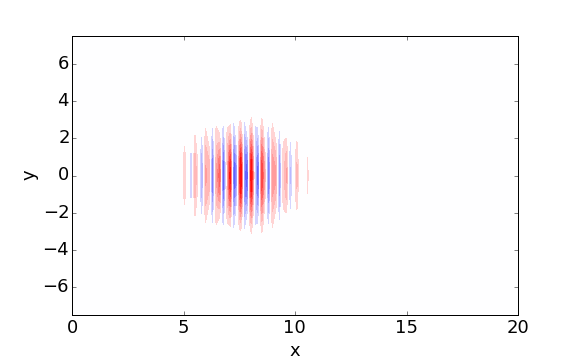
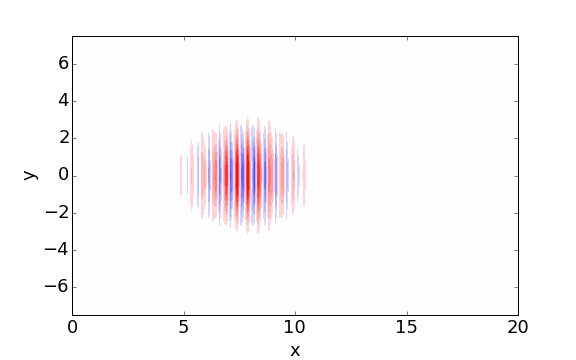
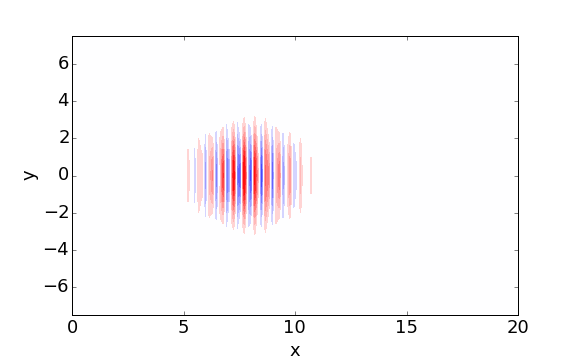
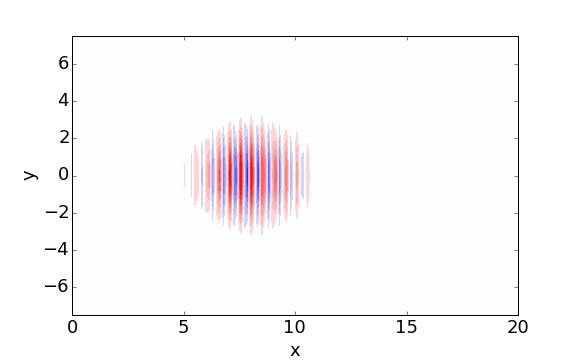
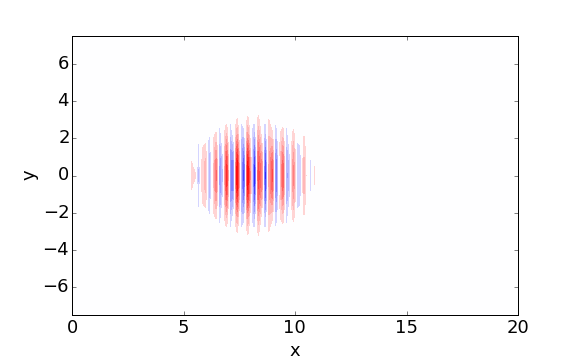
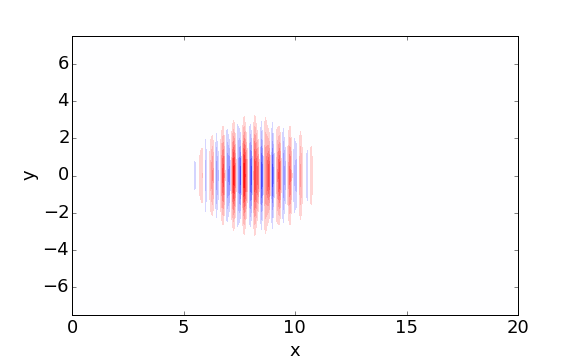
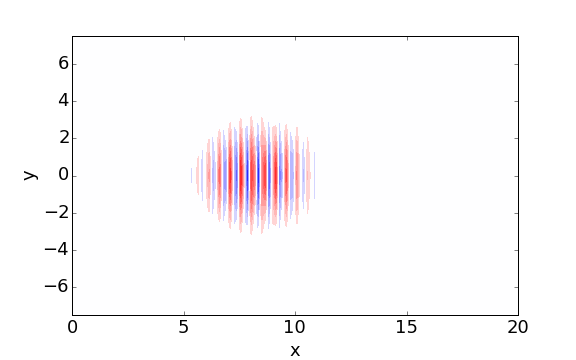
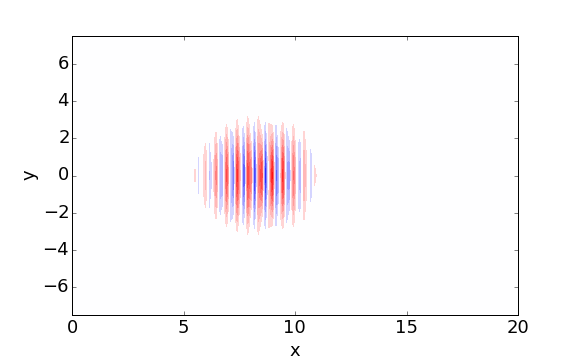
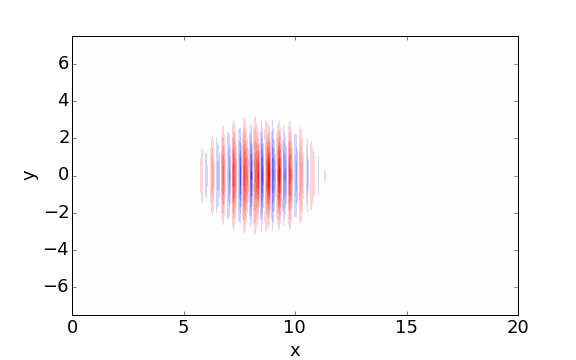
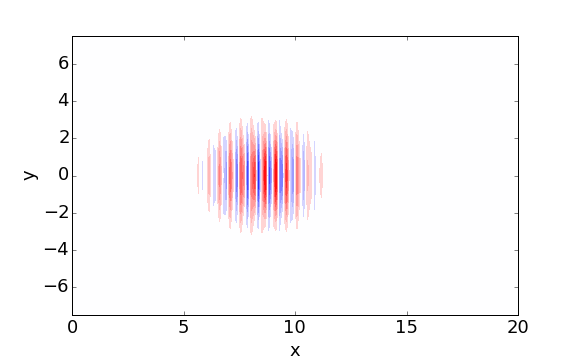
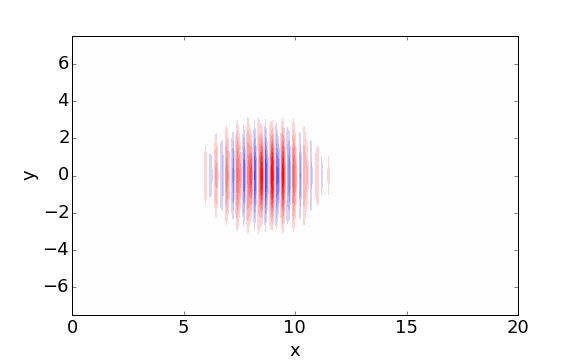
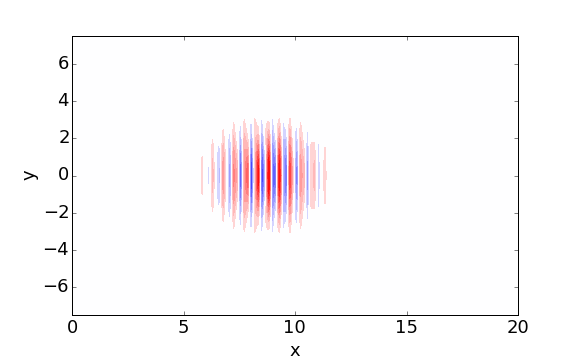
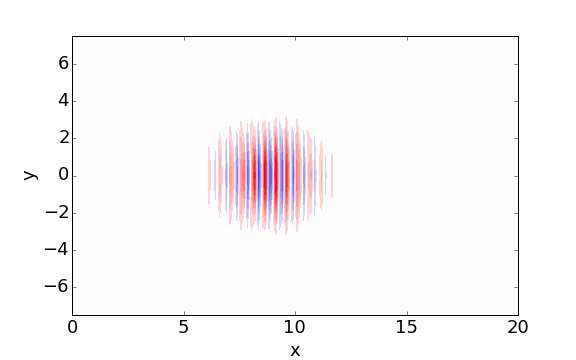
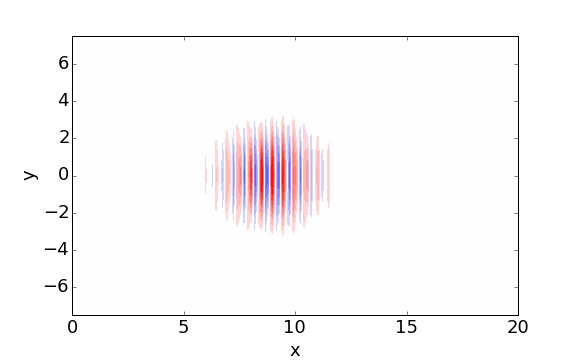
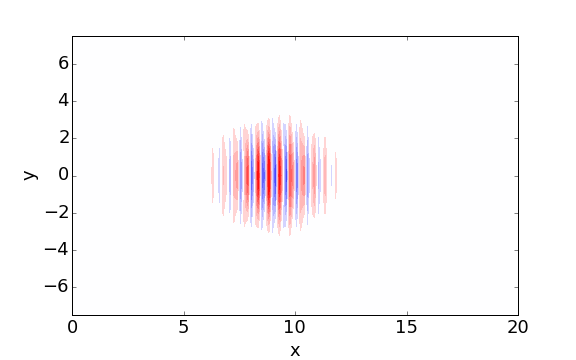
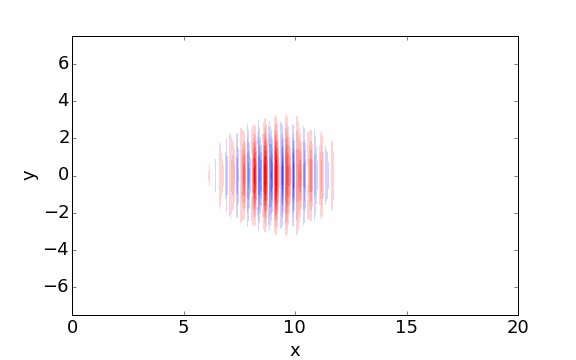
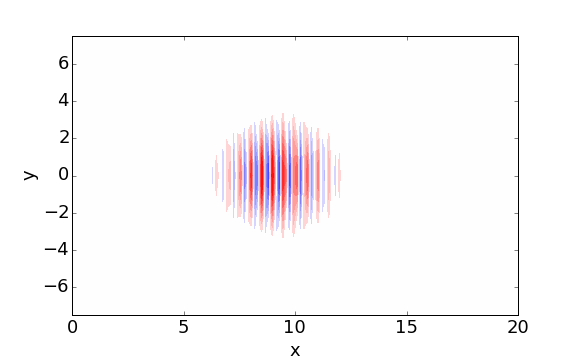
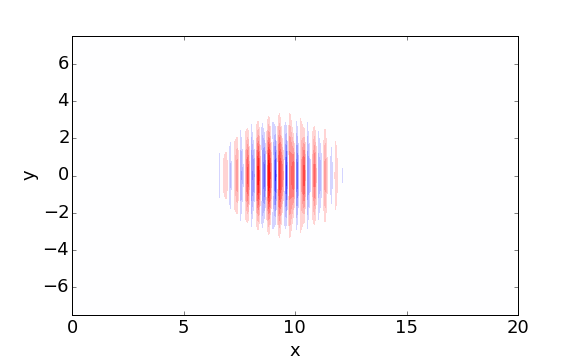
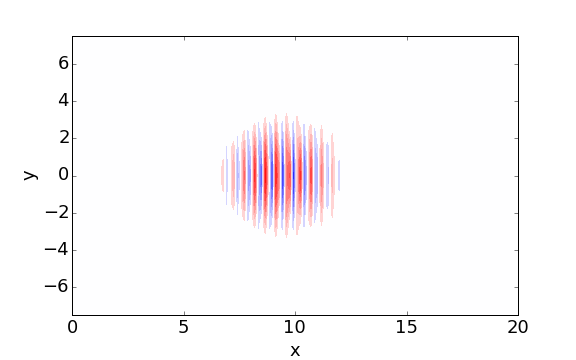
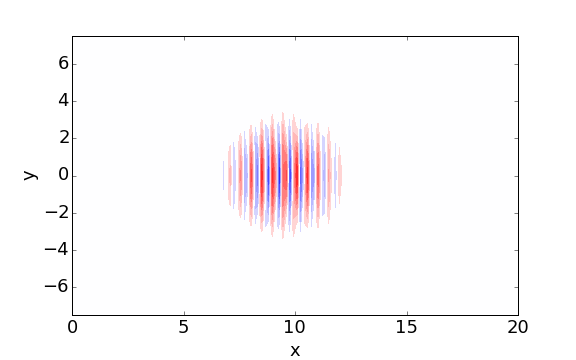
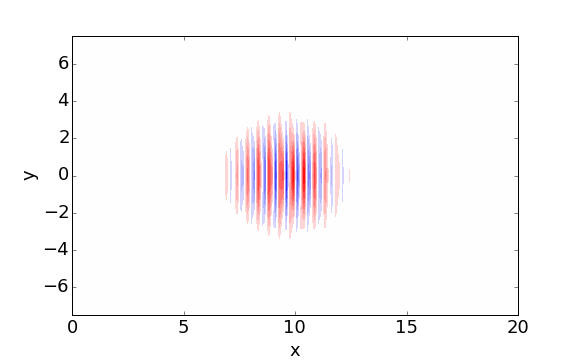
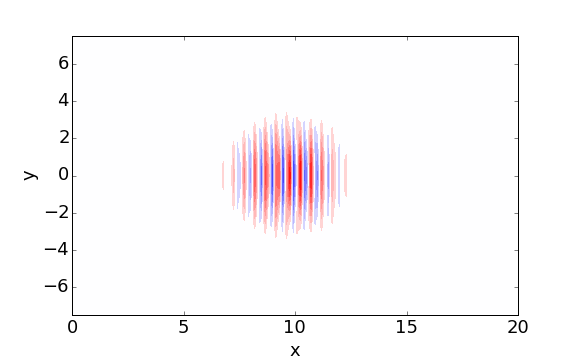
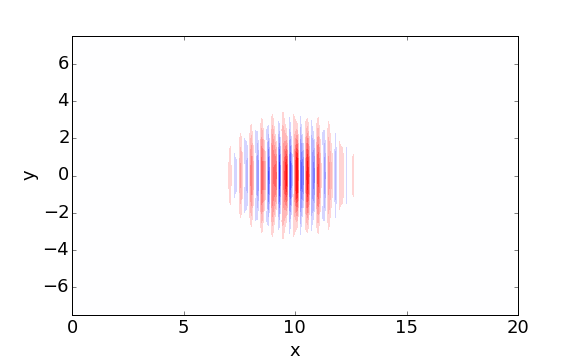
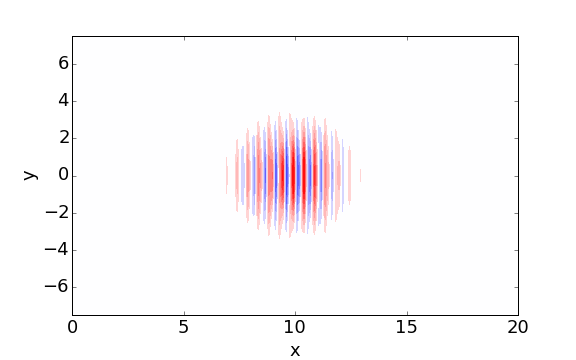
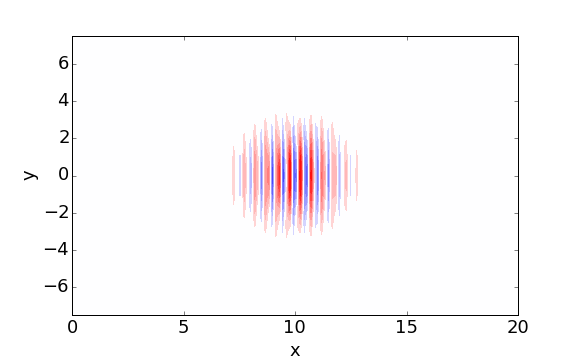
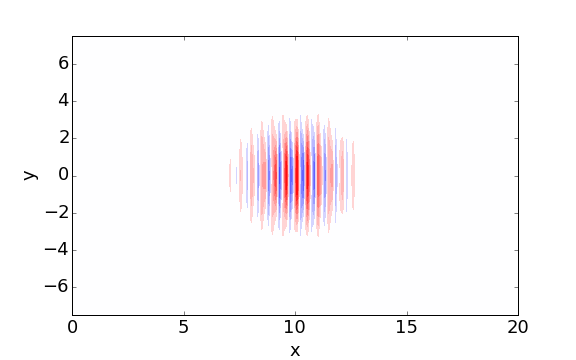
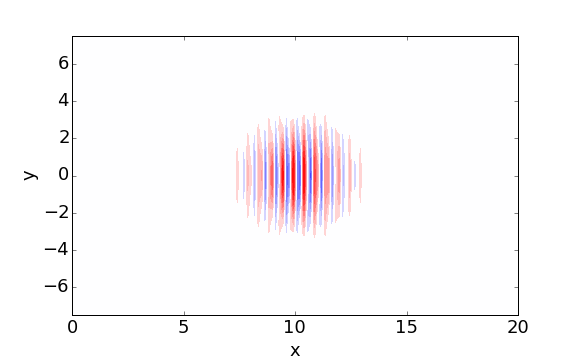
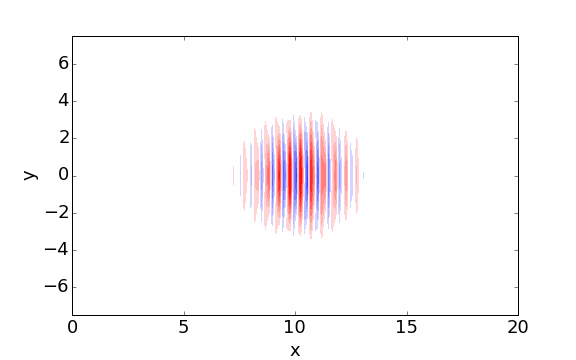
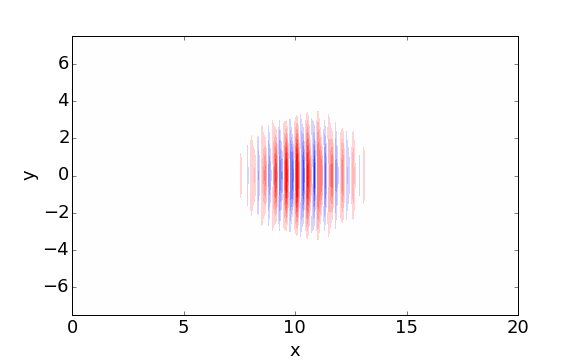
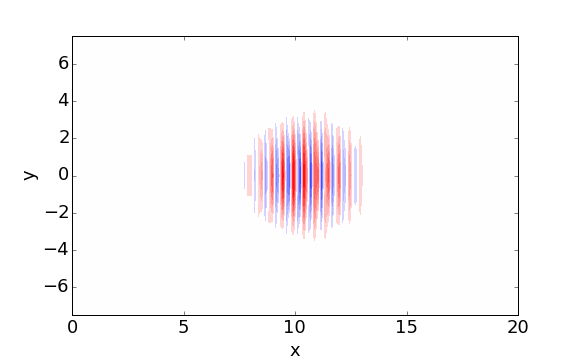
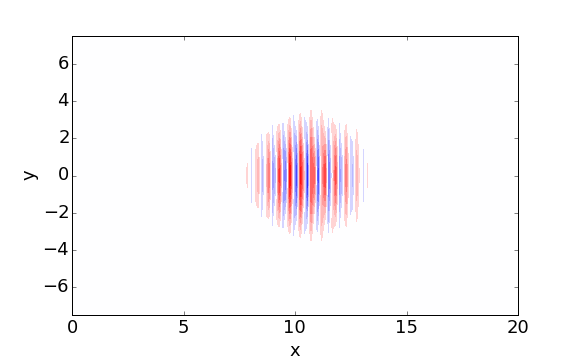
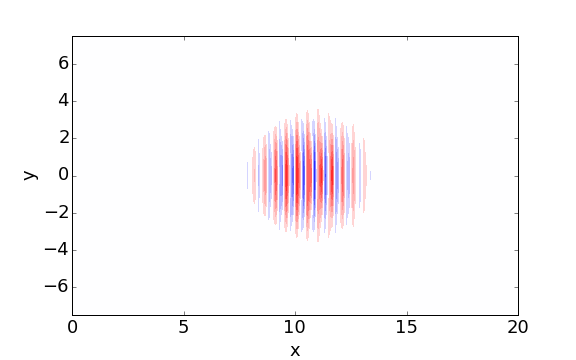
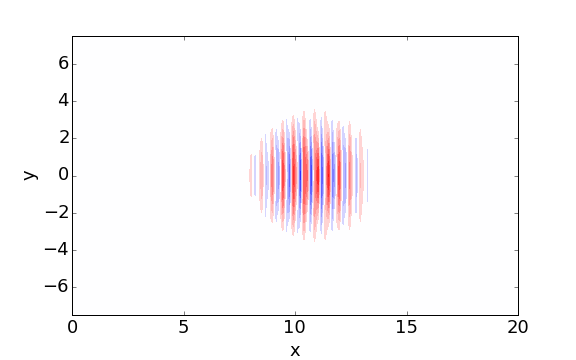
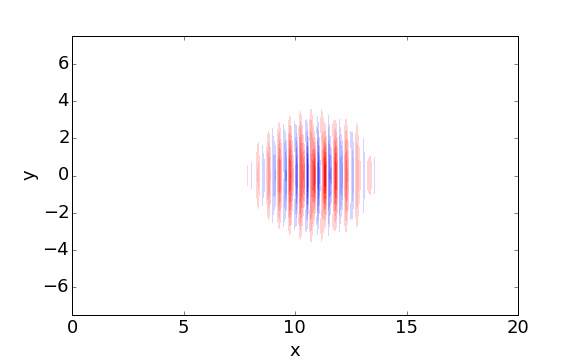
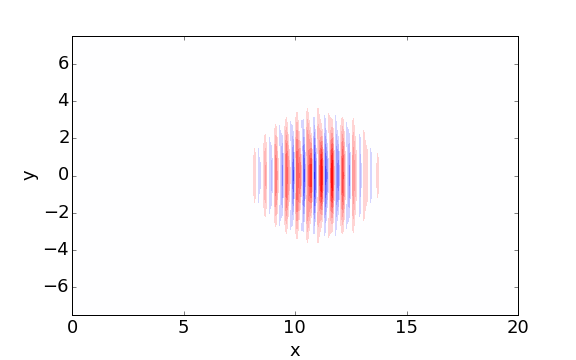
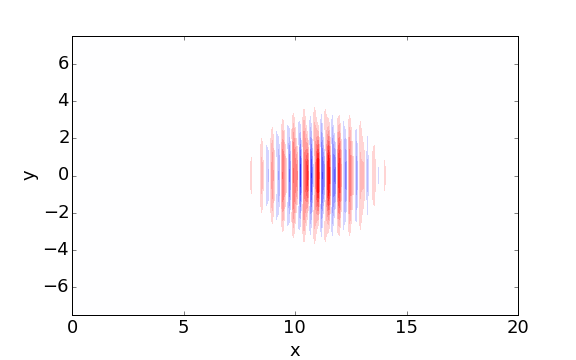
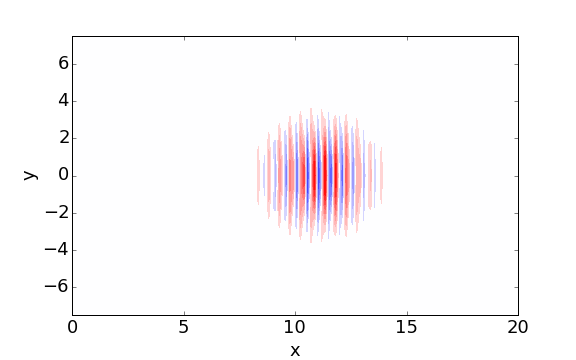
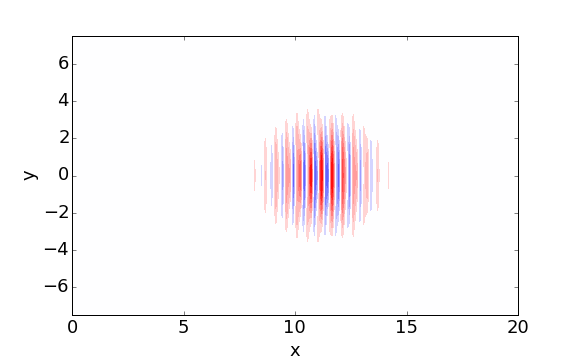
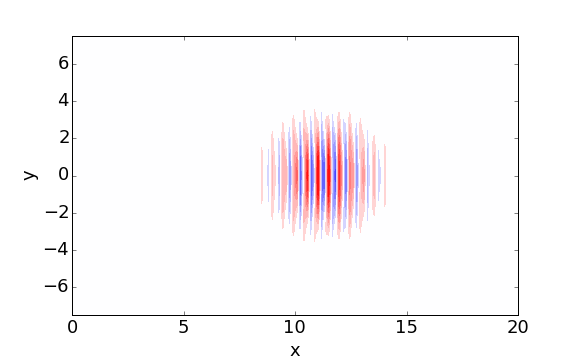
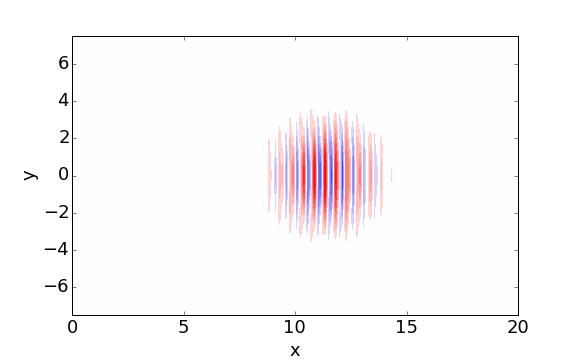
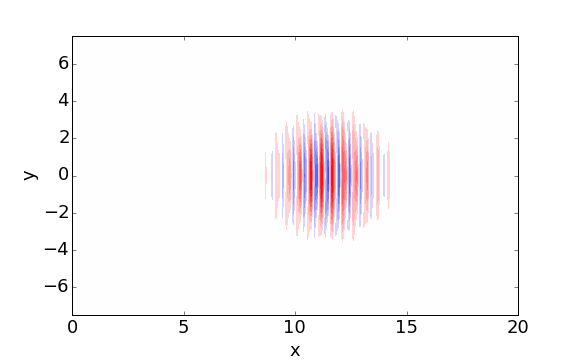
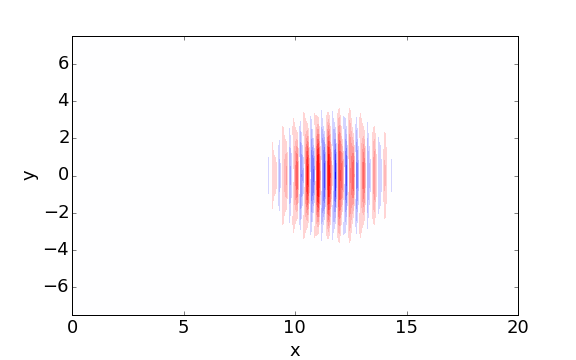
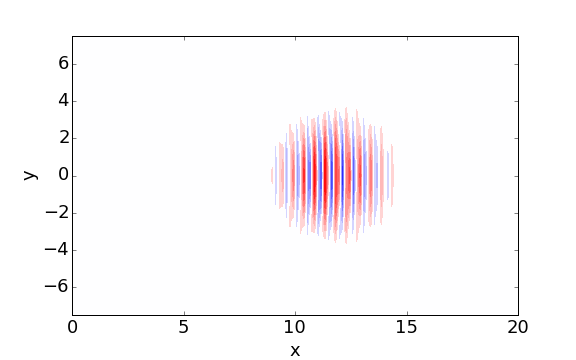
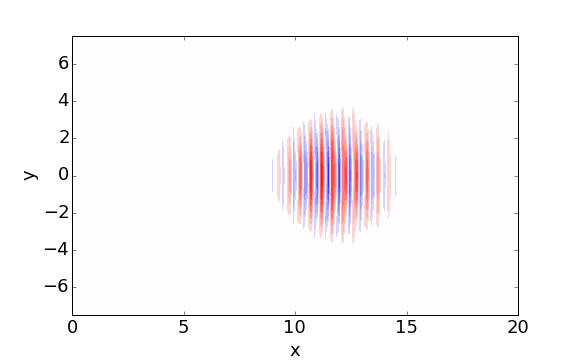
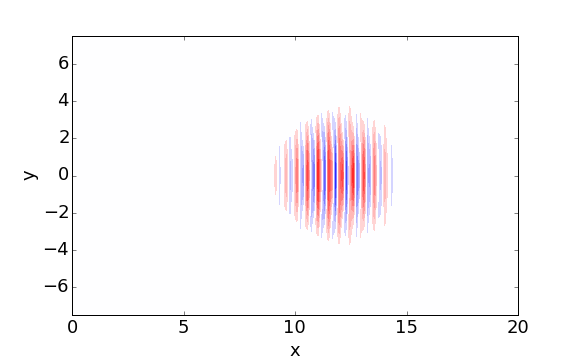
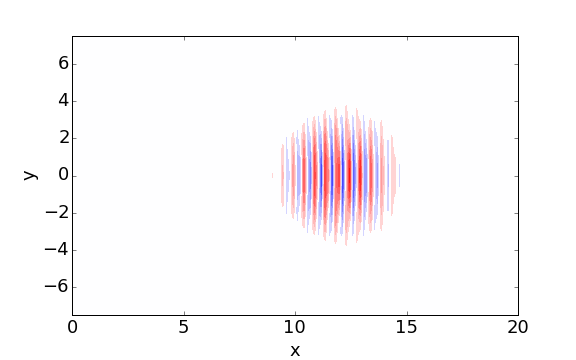
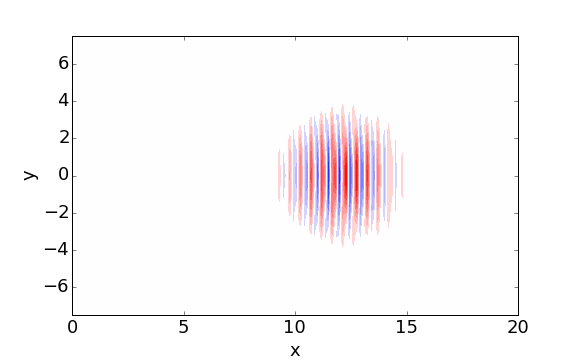
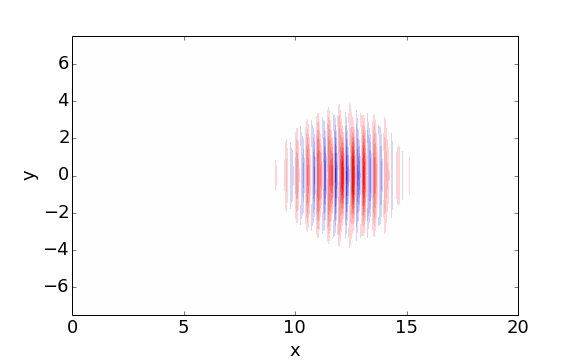
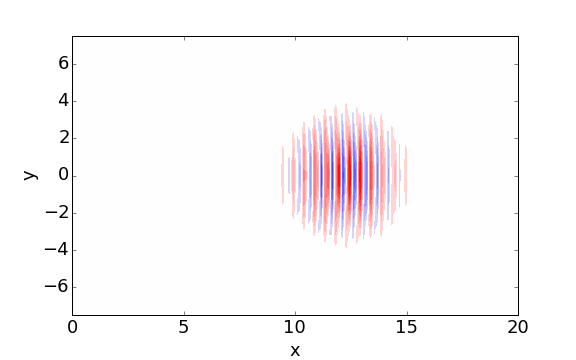
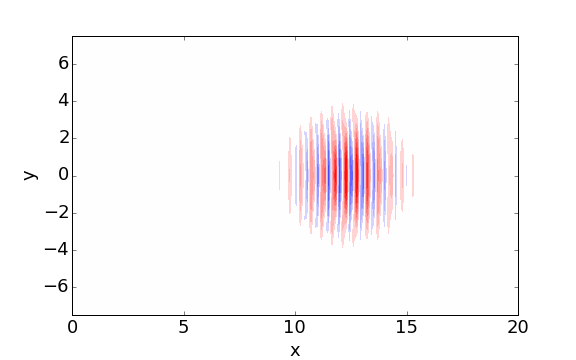
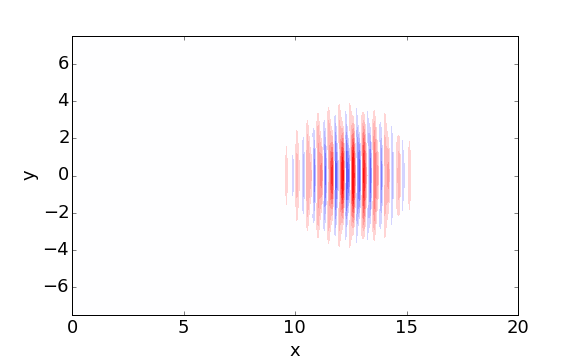
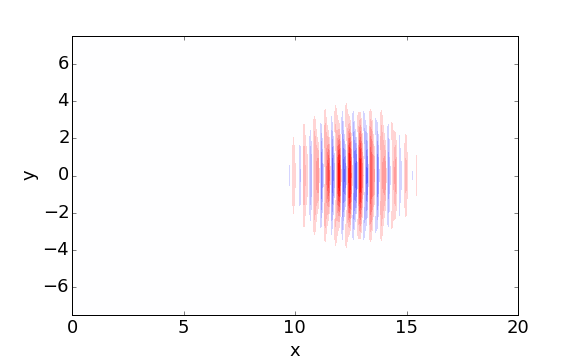
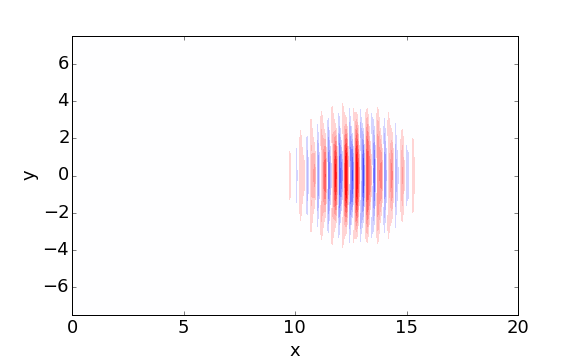
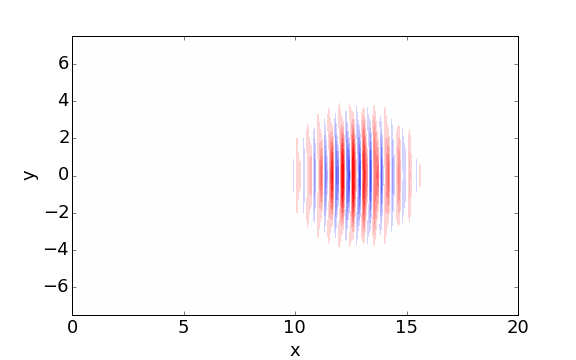
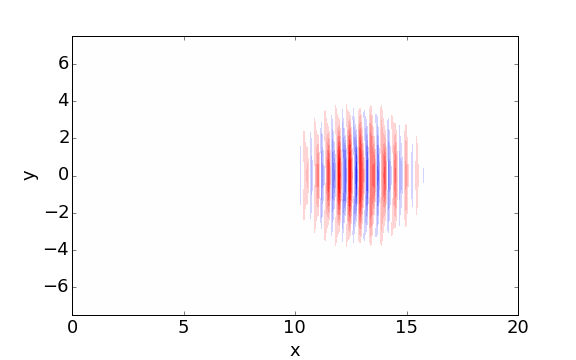
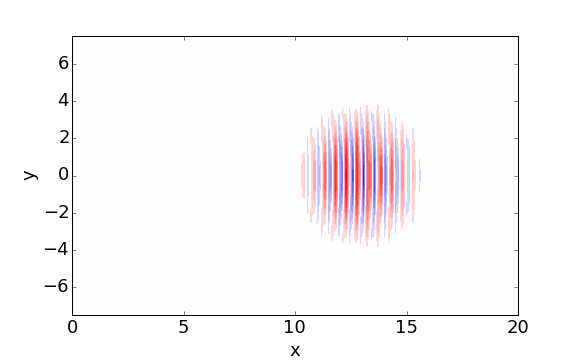
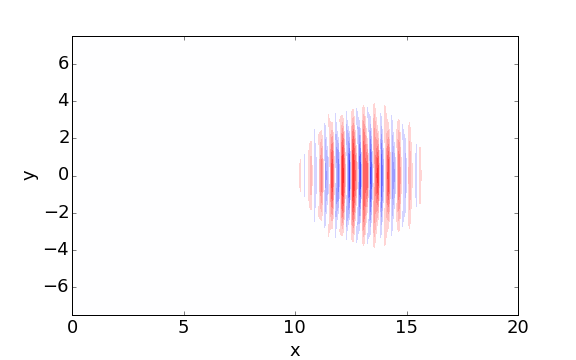
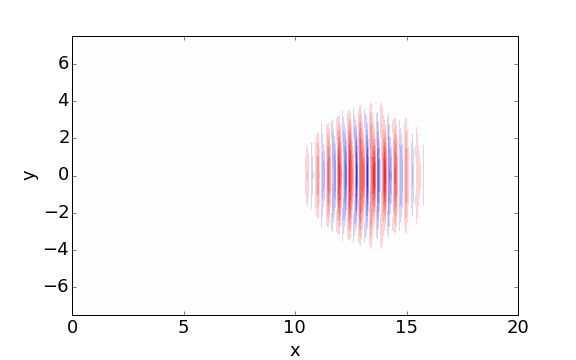
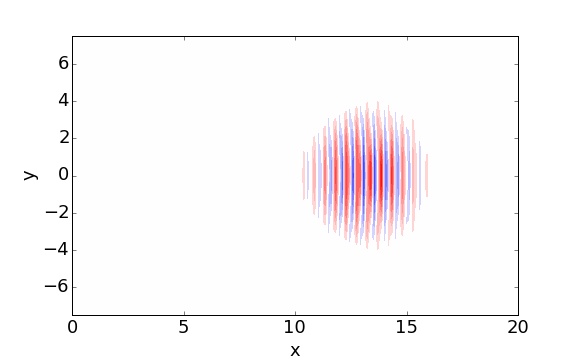
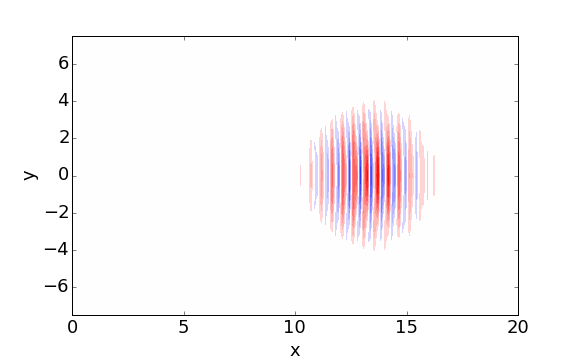
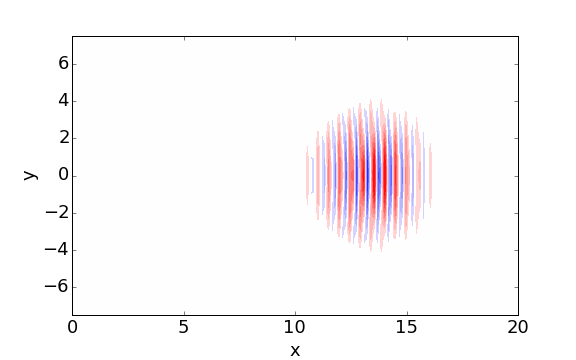
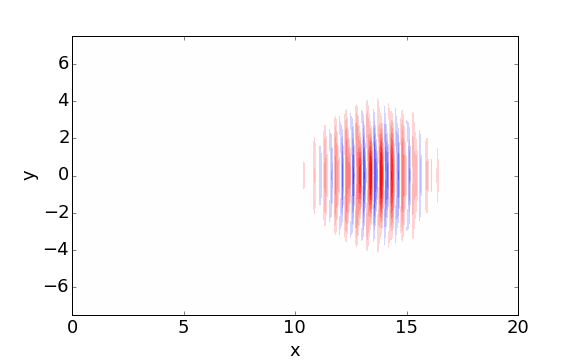
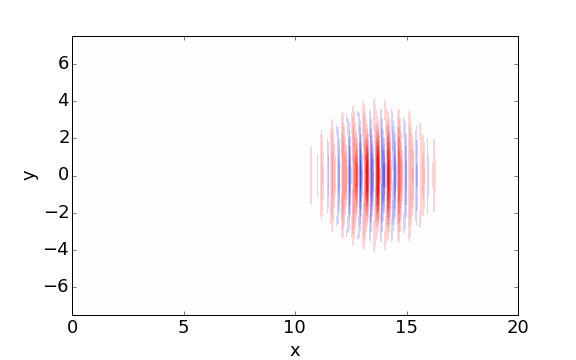
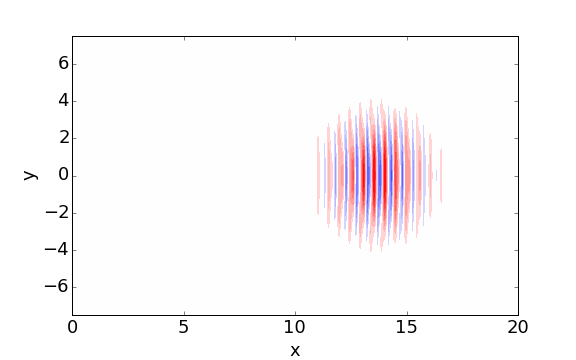
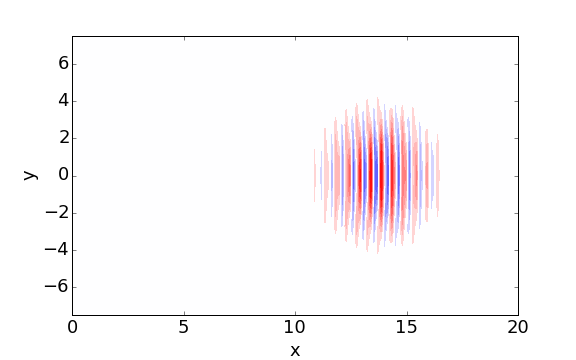
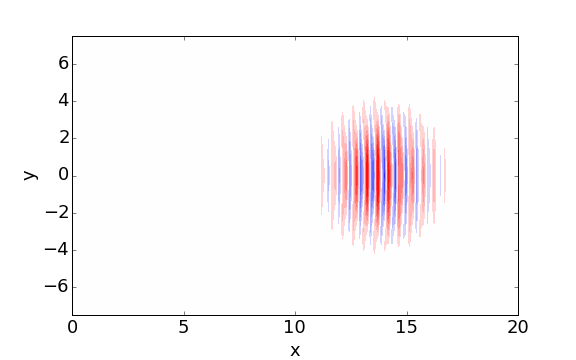
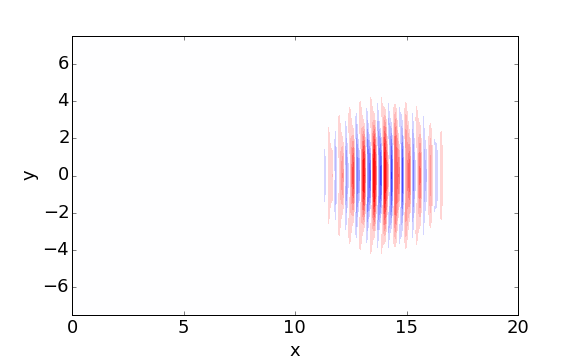
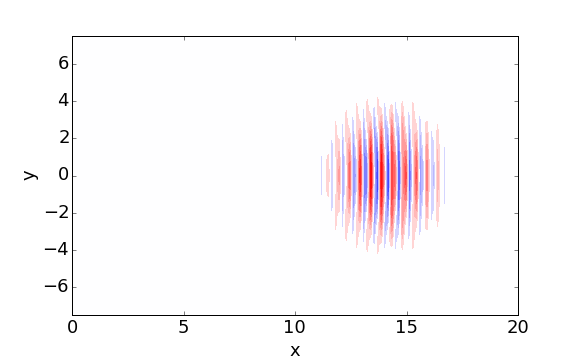
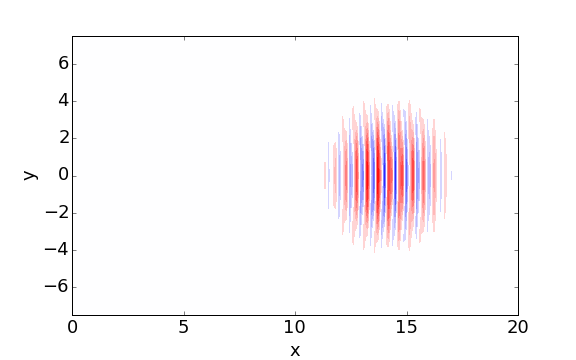
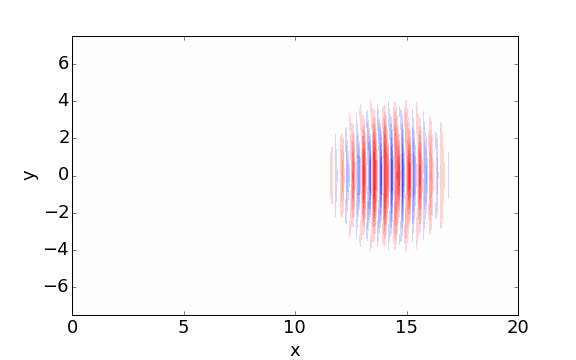
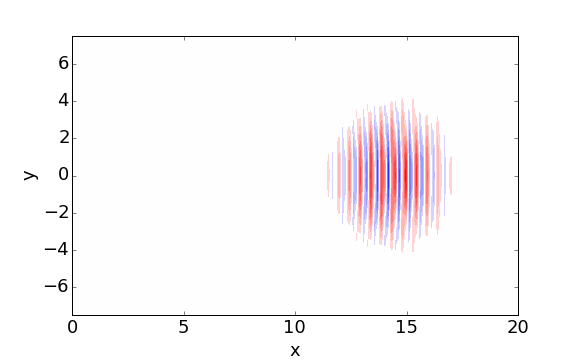
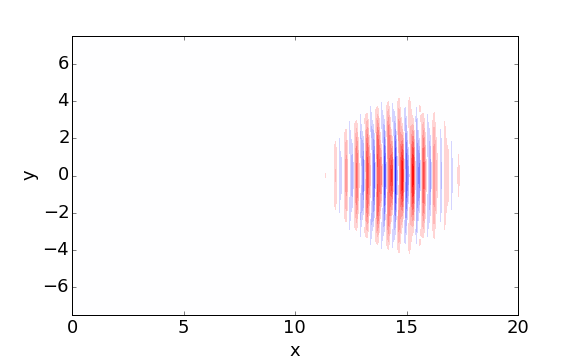

In [188]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ct = ax.contourf(x,y,v0m,vmin=-.9,vmax=.9,cmap="bwr")

ax.set_xlabel("x")
ax.set_ylabel("y")

dt = 5.
N = 100

def animate(n):
    #number.set_text('n = '+str(2*n+1))
    vt = np.fft.ifft2(np.fft.fftshift(v0f*np.exp(-ii*omega*n*dt)))
    vt = vt/np.max(np.abs(vt))
    #ct.set_data(x,y,vt)
    ct = ax.contourf(x,y,vt,ctt,vmin=-.9,vmax=.9,cmap="bwr")
    
animation.FuncAnimation(fig, animate,frames=N, interval=250)